In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('./data/names').read().splitlines()
for i, w in enumerate(words):
    words[i] = w.lower().replace("'", '').replace("-", '').replace(" ", '')
len(words)

7944

In [4]:
words[::1000]

['abagael',
 'claresta',
 'glory',
 'liliane',
 'prissie',
 'geeta',
 'giovanne',
 'piggy']

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [52]:
# build the dataset

block_size = 3 # context length: how may characters do we take to predict next one?
X, Y = [], []
for w in words[:2]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(f'{''.join([itos[i] for i in context])} ---> {ch}')
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

abagael
... ---> a
..a ---> b
.ab ---> a
aba ---> g
bag ---> a
aga ---> e
gae ---> l
ael ---> .
abagail
... ---> a
..a ---> b
.ab ---> a
aba ---> g
bag ---> a
aga ---> i
gai ---> l
ail ---> .


In [53]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([16, 3]), torch.int64, torch.Size([16]), torch.int64)

In [58]:
# look-up table (embedding matrix)
C = torch.randn((27, 2)) 

In [59]:
C[5]

tensor([-0.8705,  1.5259])

In [60]:
F.one_hot(torch.tensor(5), num_classes=27).dtype

torch.int64

In [61]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.8705,  1.5259])

In [62]:
C[torch.tensor([5, 6, 7, 7, 7])]

tensor([[-0.8705,  1.5259],
        [ 0.7025,  0.8639],
        [ 0.7630, -0.7990],
        [ 0.7630, -0.7990],
        [ 0.7630, -0.7990]])

In [63]:
C[X].shape

torch.Size([16, 3, 2])

In [64]:
emb = C[X]
emb.shape

torch.Size([16, 3, 2])

In [65]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [66]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (48x2 and 6x100)

In [67]:
emb[:, 0, :].shape

torch.Size([16, 2])

In [68]:
torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), dim=1).shape

torch.Size([16, 6])

In [69]:
torch.cat(torch.unbind(emb, dim=1), dim=1).shape

torch.Size([16, 6])

In [70]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [71]:
a.shape

torch.Size([18])

In [72]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [23]:
a.dtype

torch.int64

In [24]:
a.storage()

/tmp/ipykernel_4380/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [25]:
a.untyped_storage()

 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 2
 0
 0
 0
 0
 0
 0
 0
 3
 0
 0
 0
 0
 0
 0
 0
 4
 0
 0
 0
 0
 0
 0
 0
 5
 0
 0
 0
 0
 0
 0
 0
 6
 0
 0
 0
 0
 0
 0
 0
 7
 0
 0
 0
 0
 0
 0
 0
 8
 0
 0
 0
 0
 0
 0
 0
 9
 0
 0
 0
 0
 0
 0
 0
 10
 0
 0
 0
 0
 0
 0
 0
 11
 0
 0
 0
 0
 0
 0
 0
 12
 0
 0
 0
 0
 0
 0
 0
 13
 0
 0
 0
 0
 0
 0
 0
 14
 0
 0
 0
 0
 0
 0
 0
 15
 0
 0
 0
 0
 0
 0
 0
 16
 0
 0
 0
 0
 0
 0
 0
 17
 0
 0
 0
 0
 0
 0
 0
[torch.storage.UntypedStorage(device=cpu) of size 144]

In [73]:
# view() is extrimely efficient
# because as long as nums of elem are the same 
# it don't change, copy, move or created memory
# means that the storage is identical in these cases
# there only storage offsets, strides and shapes are manipulated

In [74]:
# so we can also do such thing
emb.view(-1, 6)

tensor([[-0.1172, -0.4151, -0.1172, -0.4151, -0.1172, -0.4151],
        [-0.1172, -0.4151, -0.1172, -0.4151,  0.8428,  1.0323],
        [-0.1172, -0.4151,  0.8428,  1.0323, -0.2844,  3.1794],
        [ 0.8428,  1.0323, -0.2844,  3.1794,  0.8428,  1.0323],
        [-0.2844,  3.1794,  0.8428,  1.0323,  0.7630, -0.7990],
        [ 0.8428,  1.0323,  0.7630, -0.7990,  0.8428,  1.0323],
        [ 0.7630, -0.7990,  0.8428,  1.0323, -0.8705,  1.5259],
        [ 0.8428,  1.0323, -0.8705,  1.5259, -1.2929,  0.5313],
        [-0.1172, -0.4151, -0.1172, -0.4151, -0.1172, -0.4151],
        [-0.1172, -0.4151, -0.1172, -0.4151,  0.8428,  1.0323],
        [-0.1172, -0.4151,  0.8428,  1.0323, -0.2844,  3.1794],
        [ 0.8428,  1.0323, -0.2844,  3.1794,  0.8428,  1.0323],
        [-0.2844,  3.1794,  0.8428,  1.0323,  0.7630, -0.7990],
        [ 0.8428,  1.0323,  0.7630, -0.7990,  0.8428,  1.0323],
        [ 0.7630, -0.7990,  0.8428,  1.0323, -0.0097, -0.5117],
        [ 0.8428,  1.0323, -0.0097, -0.5

In [75]:
emb.view(-1, 6) == torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [76]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([16, 100])

In [77]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [78]:
logits = h @ W2 + b2
logits.shape

torch.Size([16, 27])

In [79]:
counts = logits.exp()
prob = counts / counts.sum(dim=1, keepdim=True)
prob.shape

torch.Size([16, 27])

In [80]:
nll_loss = -prob[torch.arange(16), Y].log().mean()
nll_loss

tensor(15.8844)

In [81]:
# ================================================================

In [82]:
X.shape, Y.shape

(torch.Size([16, 3]), torch.Size([16]))

In [83]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [84]:
sum([ent.nelement() for ent in parameters])

3481

In [85]:
emb = C[X]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts / counts.sum(dim=1, keepdim=True)
# loss = -probs[torch.arange(16), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(18.0237)

In [86]:
for p in parameters:
    p.requires_grad = True

In [87]:
for _ in range(10):

    # forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

# print(loss.item())

18.023693084716797
12.0033540725708
8.047181129455566
4.960028171539307
3.5233519077301025
2.62719464302063
1.8504748344421387
1.2724804878234863
0.8542255163192749
0.5200614333152771


In [88]:
logits.max(dim=1)

torch.return_types.max(
values=tensor([18.9553, 16.4739, 15.7766, 12.8369,  9.1614, 12.7518,  9.9422,  6.5161,
        18.9553, 16.4739, 15.7766, 12.8369,  9.1614, 12.7518, 14.7930,  9.8367],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1,  2,  1,  7,  1,  9, 12, 11,  1,  2,  1,  7,  1,  9, 12, 25]))

In [89]:
Y

tensor([ 1,  2,  1,  7,  1,  5, 12,  0,  1,  2,  1,  7,  1,  9, 12,  0])

In [90]:
# ==================================================================================
# training on whole dataset

In [91]:
# build the dataset

block_size = 3 # context length: how may characters do we take to predict next one?
X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [92]:
X.shape, Y.shape

(torch.Size([55829, 3]), torch.Size([55829]))

In [112]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [95]:
emb = C[X]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)

In [113]:
for p in parameters:
    p.requires_grad = True

In [99]:
for _ in range(10):

    # forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

8.302356719970703
8.121752738952637
7.949055194854736
7.783924579620361
7.626022815704346
7.475013732910156
7.330563545227051
7.1923441886901855
7.060034275054932
6.9333319664001465


In [102]:
# make the minibatch GD
torch.randint(0, X.shape[0], (32,))

tensor([37109, 31745,  6971, 20325, 22669, 36517, 45449,   714, 42855,  5039,
        19938, 12471,  7816, 47724, 27065, 20543, 17458, 25466,   224, 20753,
        24732, 18498, 18263, 55366, 24191, 51494, 49366, 14308, 12785, 20550,
         5859,  2359])

In [116]:
for _ in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # batch size = 32

    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad 

print(loss.item())

2.4396374225616455


In [117]:
# evaluate the loss for all X
emb = C[X]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.5663681030273438


In [111]:
# finding the right learning rate

In [136]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [137]:
for p in parameters:
    p.requires_grad = True

In [125]:
for _ in range(100):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # batch size = 32

    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -1 * p.grad 

18.753995895385742
14.628911972045898
13.093103408813477
11.754647254943848
12.508769035339355
16.471149444580078
16.60494041442871
15.326619148254395
13.050969123840332
7.809666156768799
10.70041561126709
11.283576011657715
8.888291358947754
9.626960754394531
9.612677574157715
12.530781745910645
10.86950397491455
10.431543350219727
9.636423110961914
10.368019104003906
10.109857559204102
9.130901336669922
9.555342674255371
8.878340721130371
8.431190490722656
8.458704948425293
9.795230865478516
6.933648586273193
8.654827117919922
7.97601842880249
10.209212303161621
8.00723648071289
7.070226192474365
7.071442604064941
6.948269844055176
10.186930656433105
9.114137649536133
9.999076843261719
6.928157329559326
5.821314811706543
9.416793823242188
6.436820030212402
7.703875541687012
9.332062721252441
8.750333786010742
9.327834129333496
7.9373860359191895
8.336334228515625
8.012921333312988
8.152897834777832
9.169191360473633
9.234182357788086
7.031208515167236
7.045248508453369
10.09223175048

In [126]:
# so our optimal learning rate is between -1 and  -0.001
# torch.linspace(0.001, 1, 1000)
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre 
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [133]:
lri = []
lossi = []

for i in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # batch size = 32

    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad 

    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())

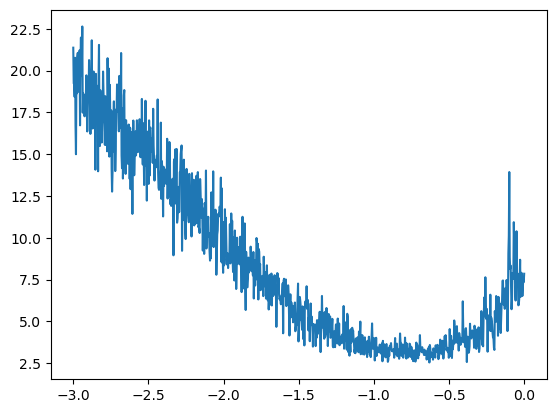

In [134]:
plt.plot(lri, lossi)

In [ ]:
# so the good learning rate somewhere around 0.1

In [156]:
for i in range(10000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # batch size = 32

    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.001 # reduce on the late stages of training
    for p in parameters:
        p.data += -lr * p.grad 

In [157]:
# evaluate the loss for all X
emb = C[X]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.117435932159424


In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [4]:
def build_dataset(words):
    block_size = 3 # context length: how may characters do we take to predict next one?
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [5]:
import random

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

In [6]:
len(words), n1, n2

(7944, 6355, 7149)

In [7]:
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([44659, 3]) torch.Size([44659])
torch.Size([5539, 3]) torch.Size([5539])
torch.Size([5631, 3]) torch.Size([5631])


In [8]:
# now training

In [175]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [176]:
for p in parameters:
    p.requires_grad = True

In [187]:
for i in range(10000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # batch size = 32

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.001 # reduce on the late stages of training
    for p in parameters:
        p.data += -lr * p.grad 

In [189]:
# evaluate the loss on train set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.182570695877075


In [190]:
# evaluate the loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.246951103210449


In [192]:
# if out training loss roughly equal to the test loss
# then we are underfitting
# so, our model lacking the parameters for data
# so, we can expect an improvement of performance when we are add the parameters to the net

In [15]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 256), generator=g)
b1 = torch.randn(256, generator=g)
W2 = torch.randn((256, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [16]:
sum(p.nelement() for p in parameters)

8785

In [17]:
for p in parameters:
    p.requires_grad = True

In [18]:
from tqdm.notebook import trange

In [42]:
lossi = []
stepi = []

for i in trange(50000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # batch size = 32

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 3 * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.01 # reduce on the late stages of training
    for p in parameters:
        p.data += -lr * p.grad 

    # track stats
    lossi.append(loss.item())
    stepi.append(i)

  0%|          | 0/50000 [00:00<?, ?it/s]

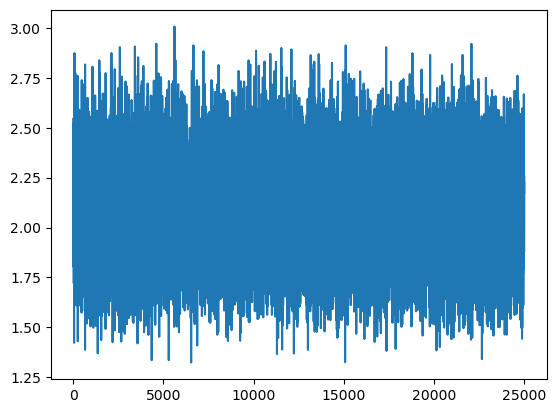

In [36]:
plt.plot(stepi, lossi)

In [43]:
# evaluate the loss on train set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 3 * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

1.9897619485855103


In [44]:
# evaluate the loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 3 * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1515016555786133


In [45]:
# so the increasing the size of the hidden layer helps a bit
# but we can also increase the embedding size - maybe it was bottleneck of out model

In [46]:
# but before let's visualize the chars embeddings

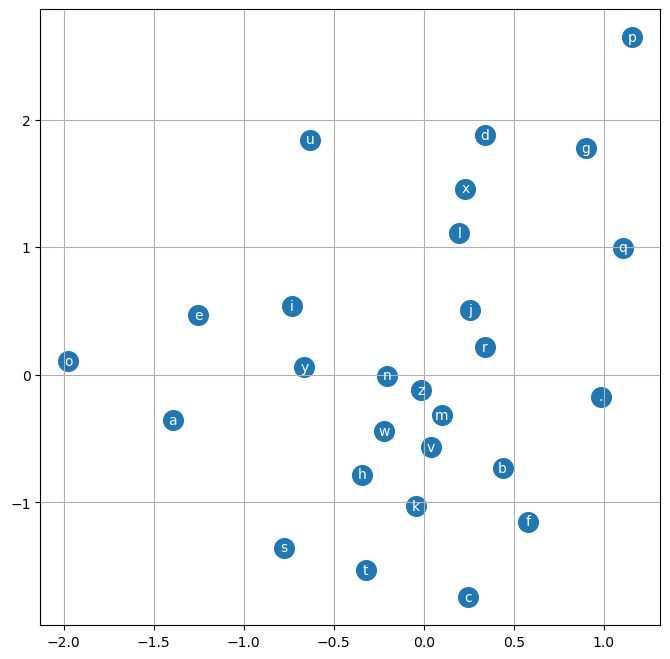

In [50]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [71]:
# let's have a 8-dimentional embedding
n_emb = 8
block_size = 3 # still has block size of 3
n_hidden = 200 # and let's also decrease the number of neurons in hidden layer

In [77]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, n_emb), generator=g)
W1 = torch.randn((n_emb * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
W2 = torch.randn((n_hidden, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [78]:
sum(p.nelement() for p in parameters)

10643

In [79]:
for p in parameters:
    p.requires_grad = True

In [80]:
lossi = []
stepi = []

In [91]:
for i in trange(50000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # batch size = 32

    # forward pass
    emb = C[Xtr[ix]] # (batch_size, block_size, n_emb)
    h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.01 # reduce on the late stages of training
    for p in parameters:
        p.data += -lr * p.grad 

    # track stats
    lossi.append(loss.log10().item())
    stepi.append(i)

  0%|          | 0/50000 [00:00<?, ?it/s]

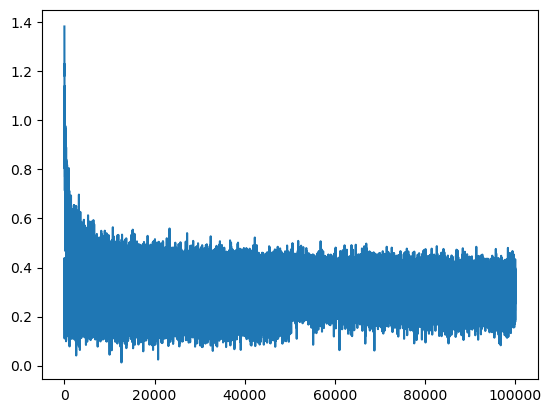

In [92]:
plt.plot(stepi, lossi)

In [93]:
# evaluate the loss on train set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

1.8465855121612549


In [94]:
# evaluate the loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, block_size * C.shape[1]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.13313627243042


In [100]:
# sampling from the model
for _ in range(25):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

core.
cha.
has.
betg.
shaylyn.
malindsa.
caree.
carmon.
shoshena.
johney.
harley.
marcod.
neis.
nis.
frandra.
rupinceseramilangoldo.
beth.
jenny.
morthy.
gerica.
uzberna.
jemnn.
janey.
fen.
malli.
